### Joblib: VERY handy to save big outputs of code

THIS IS ONLY AN EXAMPLE OF HOW joblib IS USED:

In [ ]:
#%pip install joblib  
#from joblib import dump
#from joblib import load

# To save a value/output:
dump(results_apple, 'results_apple.joblib')

# To load a value/output:
loaded_model = load('results_apple.joblib')
print(loaded_model[:5])

# INITIALIZATIONS:

In [3]:
#!pip install tensorflow
#!pip install tf-keras
#%pip install torch
#%pip install transformers
#%pip install seaborn
#%pip install joblib

import pandas as pd
import numpy as np
from joblib import dump
from joblib import load

In [4]:
df_tweets = pd.read_csv("stock_tweets_kaggle.csv")
df_tweets.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [5]:
df_apple = df_tweets[df_tweets["Stock Name"] == "AAPL"].copy()
df_tesla = df_tweets[df_tweets["Stock Name"] == "TSLA"].sample(n=5056, random_state=1)
  # Remark: We are undersampling the dataset for tesla's tweets, because there were initially 40000 of them.
  # Due to the time complexity, it takes extremely long to read all this data and process it towards our analysis.
  # We undersample it to 5056 tweets (the same amount of tweets as for Apple) using a uniform random sampling method.
df_microsoft = df_tweets[df_tweets["Stock Name"] == "MSFT"].copy()
df_google = df_tweets[df_tweets["Stock Name"] == "GOOG"].copy()

df_apple.head()

,Date,Tweet,Stock Name,Company Name
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.


# TWEETS ANALYSIS

In [6]:
from transformers import AutoModel, AutoTokenizer
from transformers import pipeline, AutoModelForSequenceClassification

# Model used: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest?text=Covid+cases+are+increasing+fast%21
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, output_hidden_states=True)
# for getting embeddings, it is important to have output_hidden_states=True, otherwise, you wont get embeddings

sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Label_2: Positive
# Label_1: Neutral
# Label_0: Negative

# Takes a couple of seconds

C:\Users\kians\OneDrive\Documenten\AIMLFSFolder\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Note: It is not necessary to run these codes with #'s in front of them if joblib is installed and imported

In [17]:
#%time results_apple = [(tweet, sentiment_pipeline(tweet)) for tweet in df_apple["Tweet"]]
#results_apple[:5]
# ~13 minutes

CPU times: total: 1h 28min 53s
Wall time: 13min 30s


[("$NIO just because I'm down money doesn't mean this is a bad investment. The whole market, everything sucks right now. 2-5 years from now, I'm confident it will pay off. Long the best $AAPL $AMZN $TSLA $GOOGL $NIO",
  [{'label': 'negative', 'score': 0.4823355972766876}]),
 ('After trading for 9+ years \n\nThis is how to find entries and exits and scale out of positions \n\nRT Like and Subscribe 🔔\n$SPY $SPX $QQQ $AAPL $AMD \n\nhttps://t.co/o9UBtIakxu',
  [{'label': 'neutral', 'score': 0.7913577556610107}]),
 ('Not something you see very often.  \n-2 ATR move on $AAPL https://t.co/CVLgPWHz3F',
  [{'label': 'neutral', 'score': 0.8344758152961731}]),
 ('$AAPL was down almost 5% today. Rare to see it sell off like this. Headline was fears of demand slowly triggered the BofA downgrade. \n\nDespite the fears, demand seems to be favorable for iPhone 14. At least for today.',
  [{'label': 'negative', 'score': 0.5712100267410278}]),
 ('$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT THAT HAD B

In [31]:
#dump(results_apple, 'results_apple.joblib')

['results_apple.joblib']

In [42]:
#%time results_microsoft = [(tweet, sentiment_pipeline(tweet)) for tweet in df_microsoft["Tweet"]]
#results_microsoft[:5]
#dump(results_microsoft, 'results_microsoft.joblib')

# ~13 minutes

CPU times: total: 1h 11min 32s
Wall time: 13min 8s


['results_microsoft.joblib']

In [43]:
#results_google = [(tweet, sentiment_pipeline(tweet)) for tweet in df_google["Tweet"]]
#results_google[:5]
#dump(results_google, 'results_google.joblib')

# ~4 minutes

['results_google.joblib']

In [11]:
#df_tesla = df_tweets[df_tweets["Stock Name"] == "TSLA"].sample(n=5056, random_state=1)
#%time results_tesla = [(tweet, sentiment_pipeline(tweet)) for tweet in df_tesla["Tweet"]]
#results_tesla[:5]
#dump(results_tesla, 'results_tesla.joblib')

# ~15 minutes

CPU times: total: 1h 40min 48s
Wall time: 15min 45s


['results_tesla.joblib']

In [23]:
#results_apple = load('results_apple.joblib')
#results_apple[:5]

[("$NIO just because I'm down money doesn't mean this is a bad investment. The whole market, everything sucks right now. 2-5 years from now, I'm confident it will pay off. Long the best $AAPL $AMZN $TSLA $GOOGL $NIO",
  [{'label': 'negative', 'score': 0.4823355972766876}]),
 ('After trading for 9+ years \n\nThis is how to find entries and exits and scale out of positions \n\nRT Like and Subscribe 🔔\n$SPY $SPX $QQQ $AAPL $AMD \n\nhttps://t.co/o9UBtIakxu',
  [{'label': 'neutral', 'score': 0.7913577556610107}]),
 ('Not something you see very often.  \n-2 ATR move on $AAPL https://t.co/CVLgPWHz3F',
  [{'label': 'neutral', 'score': 0.8344758152961731}]),
 ('$AAPL was down almost 5% today. Rare to see it sell off like this. Headline was fears of demand slowly triggered the BofA downgrade. \n\nDespite the fears, demand seems to be favorable for iPhone 14. At least for today.',
  [{'label': 'negative', 'score': 0.5712100267410278}]),
 ('$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT THAT HAD B

Instead, RUN THESE:

In [7]:
results_apple = load('results_apple.joblib')
results_tesla = load('results_tesla.joblib')
results_google = load('results_google.joblib')
results_microsoft = load('results_microsoft.joblib')

# TWEETS SENTIMENT VS. STOCK PRICE

## Daily Means Sentiment, with Manipulation Score

In [8]:
#%pip install pandas-datareader
#%pip install yfinance
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import RobustScaler

plt.rcdefaults()
yfin.pdr_override()

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [ ]:
# The variables for the final manipulation scores are:
#   apple_manipulation_percentage_combined
#   tesla_manipulation_percentage_combined
#   google_manipulation_percentage_combined
#   microsoft_manipulation_percentage_combined
#
# You can find the values of these below each of the graph plots.

## APPLE: 

[*********************100%%**********************]  1 of 1 completed


Number of rows in df_merged_apple: 252
Manipulation Percentage A: 34.375%


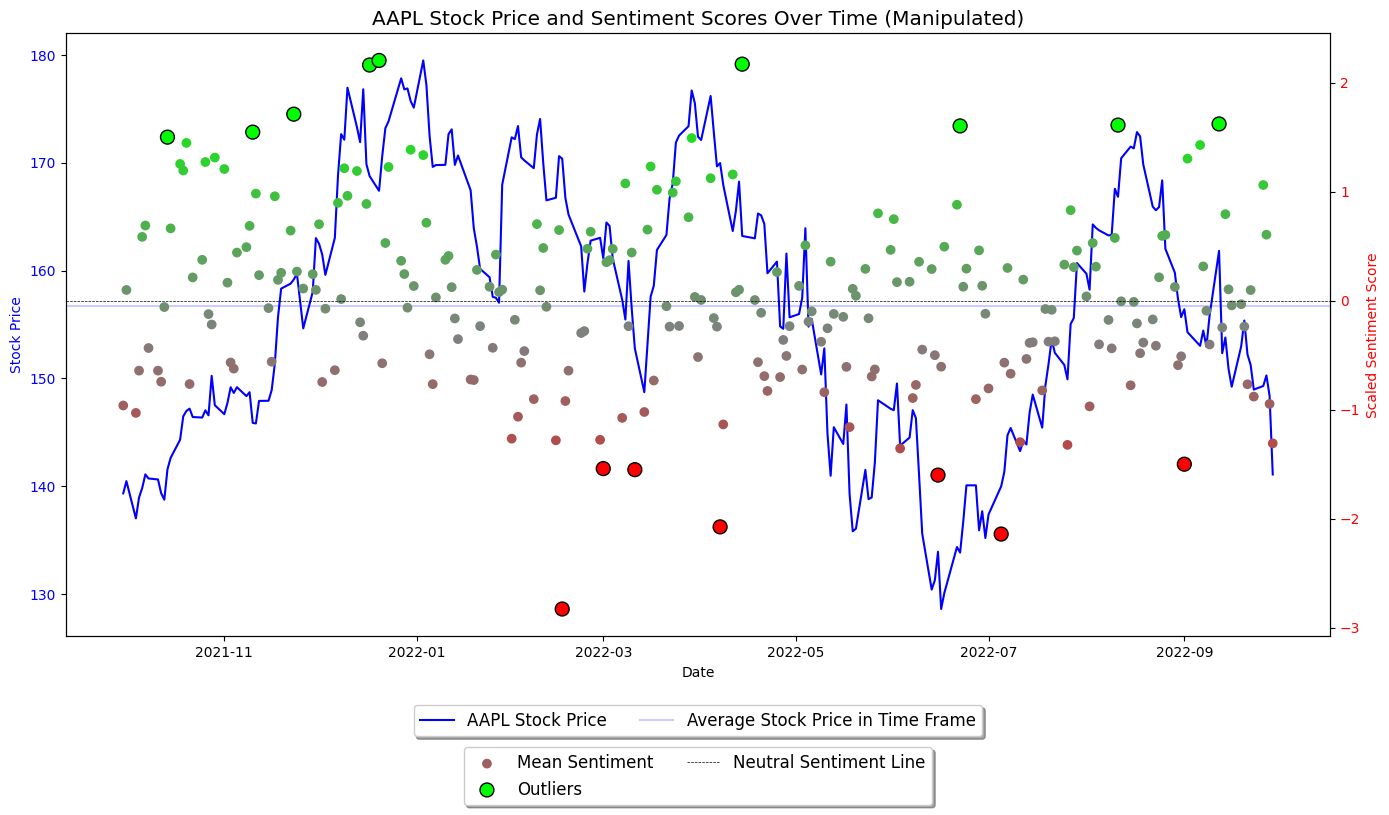

Manipulation Percentage B: 17.1875%
Total Manipulation Percentage of Tweets: 25.78125%


C:\Users\kians\AppData\Local\Temp\ipykernel_78304\4266687125.py:114: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_extreme_scores = df_apple_filtered.groupby('Date').apply(


In [9]:
aapl_stock = get(['AAPL'], datetime.datetime(2018, 10, 1), datetime.datetime(2024, 1, 1))
aapl_stock = aapl_stock.reset_index(level='Ticker', drop=True).reset_index()

final_scores = []
for result in results_apple:
    sentiment = result[1][0]
    label = sentiment["label"]
    score = sentiment["score"]

    # LABEL_0: Negative
    # LABEL_1: Neutral
    # LABEL_2: Positive
    if label == "positive":
        final_scores.append(score)
    elif label == "negative":
        final_scores.append(-1 * score)
    else:
        final_scores.append(0)
df_apple.loc[:, "score"] = final_scores
# Now the data and scores are merged

df_apple['Date'] = pd.to_datetime(df_apple['Date']).dt.normalize()
df_apple['Date'] = pd.to_datetime(df_apple['Date']).dt.tz_localize(None)
aapl_stock['Date'] = pd.to_datetime(aapl_stock['Date']).dt.normalize()

df_apple_filtered = df_apple[(df_apple['Date'] >= aapl_stock['Date'].min()) & (df_apple['Date'] <= aapl_stock['Date'].max())]

# Aggregate sentiment scores by taking mean for each date:
df_apple_agg = df_apple_filtered.groupby('Date').agg({'score': 'mean'}).reset_index()

# Merge it with stock dataframe:
df_merged_apple = pd.merge(aapl_stock, df_apple_agg, on='Date', how='inner')
print("Number of rows in df_merged_apple:", len(df_merged_apple))

# Short- and Long-term moving averages:
short_window = 20
long_window = 50
df_merged_apple['SMA'] = df_merged_apple['Adj Close'].rolling(window=short_window).mean()
df_merged_apple['LMA'] = df_merged_apple['Adj Close'].rolling(window=long_window).mean()

# Scaler for our practicality of detecting outliers:
scaler = RobustScaler()
df_merged_apple['scaled_score'] = scaler.fit_transform(df_merged_apple[['score']])

# custom threshold of outliers
threshold = 1.5
outliers = df_merged_apple[(df_merged_apple['scaled_score'] > threshold) | (df_merged_apple['scaled_score'] < -threshold)]

# Dataframe of only outliers:
outliers_df = df_merged_apple.loc[outliers.index]

below_lma = df_merged_apple['SMA'] < df_merged_apple['LMA']
above_lma = df_merged_apple['SMA'] > df_merged_apple['LMA']

# Custom-made system to determine a manipulation index,
# giving outliers 1, 2 or 8 points based on relativity to stock price condition:
def manipulation_score(row):
    if (row['scaled_score'] > 0 and below_lma.loc[row.name]) or (row['scaled_score'] < 0 and above_lma.loc[row.name]):
        return 8
    elif (row['scaled_score'] > 0 and df_merged_apple['Adj Close'].loc[row.name] < df_merged_apple['Adj Close'].shift(1).loc[row.name]) or (row['scaled_score'] < 0 and df_merged_apple['Adj Close'].loc[row.name] > df_merged_apple['Adj Close'].shift(1).loc[row.name]):
        return 2
    else:
        return 1

outliers_df['Manipulation Score'] = outliers_df.apply(manipulation_score, axis=1)

manipulation_ratio_1 = outliers_df['Manipulation Score'].sum() / (len(outliers_df) * 8)
manipulation_percentage_1 = f"{100 * manipulation_ratio_1}%"
print("Manipulation Percentage A:", manipulation_percentage_1)

# Custom color map for sentiment plots
colors = [(1, 0, 0), (0.5, 0.5, 0.5), (0, 1, 0)]  # R -> Gray -> G
n_bins = 100  # Discretize the color map into 100 bins
cmap_name = 'sentiment_cmap'
sentiment_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Normalizing the sentiment scores to [0, 1] for color mapping
norm = plt.Normalize(df_merged_apple['scaled_score'].min(), df_merged_apple['scaled_score'].max())
sm = plt.cm.ScalarMappable(cmap=sentiment_cmap, norm=norm)
df_merged_apple['color'] = df_merged_apple['scaled_score'].apply(lambda x: sm.to_rgba(x))

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting Adj. Close prices
sns.lineplot(x='Date', y='Adj Close', data=df_merged_apple, ax=ax1, color='blue', label='AAPL Stock Price')
ax1.set_ylabel('Stock Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
avg_stock_price = df_merged_apple['Adj Close'].mean()
ax1.axhline(y=avg_stock_price, color='blue', linestyle='-', label=f'Average Stock Price in Time Frame', alpha=0.2)

# Plotting the combined mean of sentiment scores
ax2 = ax1.twinx()
ax2.scatter(df_merged_apple['Date'], df_merged_apple['scaled_score'], color=df_merged_apple['color'], label='Mean Sentiment')
ax2.scatter(outliers_df['Date'], outliers_df['scaled_score'], 
            c=outliers_df['scaled_score'].apply(lambda x: 'lime' if x >= 0 else 'red'), 
            marker='o', edgecolors='black', label='Outliers', s=100)  # Adjust size of outliers
ax2.axhline(y=0.0, color='black', linestyle='--', linewidth=0.5, label='Neutral Sentiment Line')  # Add horizontal line at sentiment score 0.0
ax2.set_ylabel('Scaled Sentiment Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
plt.title('AAPL Stock Price and Sentiment Scores Over Time (Manipulated)', fontsize='x-large')
fig.tight_layout()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2, fontsize='large')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17), shadow=True, ncol=2, fontsize='large')

plt.show()

# New way of determining sentiment plots per date: 
# Instead of taking the full mean, we are taking the mean of the 5 largest and 5 lowest sentiment scores combined.
# This identifies different outlier points than before where we take the enitre mean, because we ONLY value the extreme sentiment scores here.
av_count = 5
df_extreme_scores = df_apple_filtered.groupby('Date').apply(
    lambda x: pd.concat([x.nlargest(av_count, 'score'), x.nsmallest(av_count, 'score')])
).reset_index(drop=True)

# Calculation of combined mean of the 5 highest and 5 lowest sentiment scores for each date:
df_combined_mean = df_extreme_scores.groupby('Date')['score'].mean().reset_index()

# Apply RobustScaler again:
scaler = RobustScaler()
df_combined_mean['scaled_score'] = scaler.fit_transform(df_combined_mean[['score']])

# Detect outliers based on the same custom threshold:
threshold = 1.5
outliers2 = df_combined_mean[(df_combined_mean['scaled_score'] > threshold) | (df_combined_mean['scaled_score'] < -threshold)]

# New dataframe of outliers:
outliers2_df = pd.merge(outliers2, aapl_stock, on='Date', how='inner')

df_merged_apple = pd.merge(aapl_stock, df_combined_mean, on='Date', how='inner')

# Calculate short-term and long-term moving averages
short_window = 20
long_window = 50

df_merged_apple['SMA'] = df_merged_apple['Adj Close'].rolling(window=short_window).mean()
df_merged_apple['LMA'] = df_merged_apple['Adj Close'].rolling(window=long_window).mean()

outliers2_df['Manipulation Score'] = outliers2_df.apply(manipulation_score, axis=1)

# Print the desired ratio
manipulation_ratio_2 = outliers2_df['Manipulation Score'].sum() / (len(outliers2_df) * 8)
manipulation_percentage_2 = f"{100 * manipulation_ratio_2}%"
print("Manipulation Percentage B:", manipulation_percentage_2)

manipulation_ratio_combined = (manipulation_ratio_1 + manipulation_ratio_2) / 2
apple_manipulation_percentage_combined = f"{100 * manipulation_ratio_combined}%"
print("Total Manipulation Percentage of Tweets:", apple_manipulation_percentage_combined)

## TESLA:

Method 1: Daily Mean Sentiment
Method 1 continuation: Scaled Daily Mean Sentiment, with Outliers

Method 2: Daily Extremes-Mean Sentiment
Method 2 continuation: Scaled Daily Extremes-Mean Sentiment, with Outliers

[*********************100%%**********************]  1 of 1 completed


Number of rows in df_merged_tesla: 252
Manipulation Percentage A: 37.5%


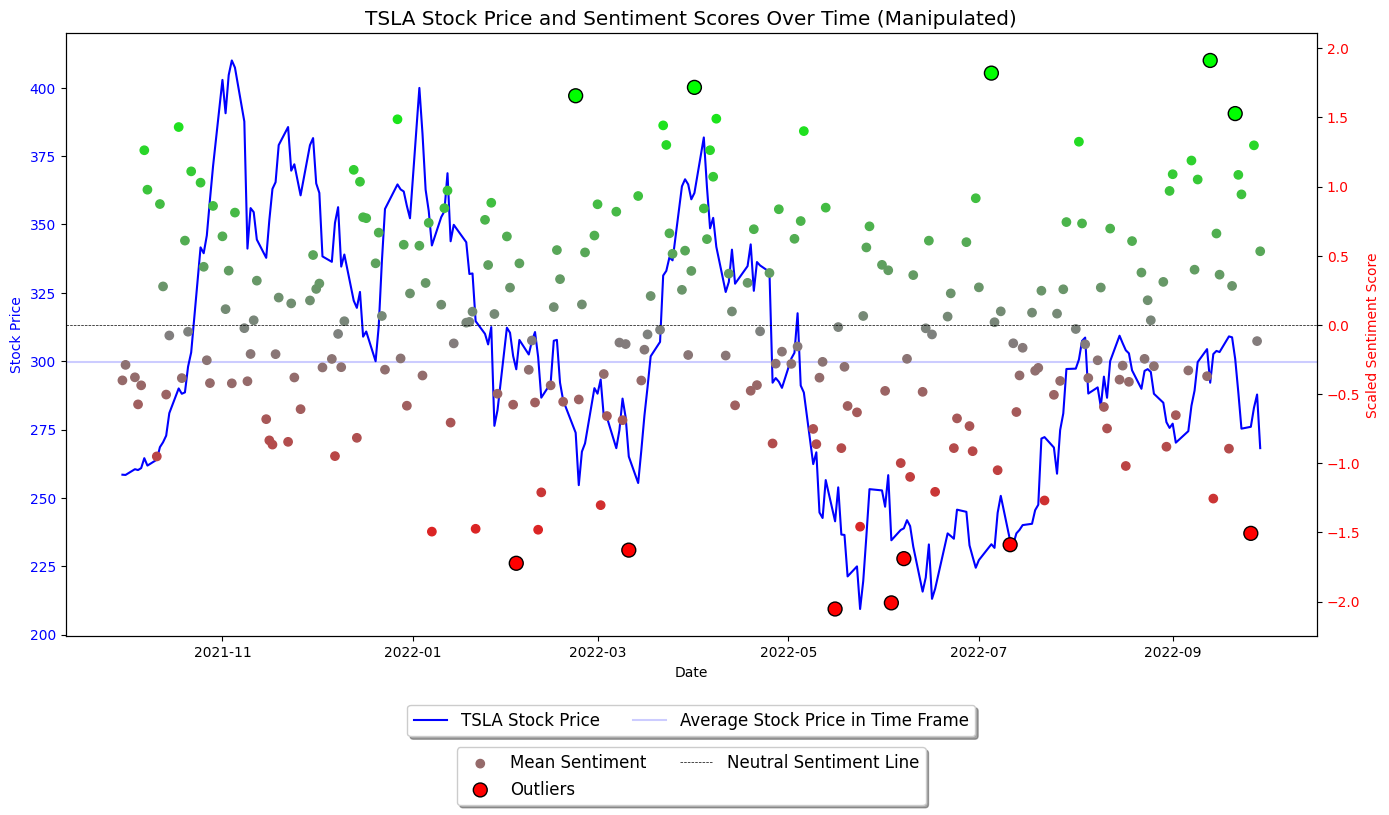

Manipulation Percentage B: 19.318181818181817%
Total Manipulation Percentage of Tweets: 28.409090909090907%


C:\Users\kians\AppData\Local\Temp\ipykernel_78304\1722081019.py:117: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_extreme_scores = df_tesla_filtered.groupby('Date').apply(


In [10]:
tsla_stock = get(["TSLA"], datetime.datetime(2018, 10, 1), datetime.datetime(2024, 1, 1))
tsla_stock = tsla_stock.reset_index(level='Ticker', drop=True).reset_index()

final_scores = []
for result in results_tesla:
    sentiment = result[1][0]
    label = sentiment["label"]
    score = sentiment["score"]

    # LABEL_0: Negative
    # LABEL_1: Neutral
    # LABEL_2: Positive
    if label == "positive":
        final_scores.append(score)
    elif label == "negative":
        final_scores.append(-1*score)
    else:
        final_scores.append(0)
df_tesla.loc[:,"score"] = final_scores
# Now the data and scores are merged

df_tesla['Date'] = pd.to_datetime(df_tesla['Date']).dt.normalize()
df_tesla['Date'] = pd.to_datetime(df_tesla['Date']).dt.tz_localize(None)
tsla_stock['Date'] = pd.to_datetime(tsla_stock['Date']).dt.normalize()

df_tesla_filtered = df_tesla[(df_tesla['Date'] >= tsla_stock['Date'].min()) & (df_tesla['Date'] <= tsla_stock['Date'].max())]

# Aggregate sentiment scores by taking mean for each date:
df_tesla_agg = df_tesla_filtered.groupby('Date').agg({'score': 'mean'}).reset_index()

# Merge it with stock dataframe:
df_merged_tesla = pd.merge(tsla_stock, df_tesla_agg, on='Date', how='inner')
print("Number of rows in df_merged_tesla:", len(df_merged_tesla))

# Short- and Long-term moving averages:
short_window = 20
long_window = 50
df_merged_tesla['SMA'] = df_merged_tesla['Adj Close'].rolling(window=short_window).mean()
df_merged_tesla['LMA'] = df_merged_tesla['Adj Close'].rolling(window=long_window).mean()

# Scaler for our practicality of detecting outliers:
scaler = RobustScaler()
df_merged_tesla['scaled_score'] = scaler.fit_transform(df_merged_tesla[['score']])

# custom threshold of outliers
threshold = 1.5
outliers = df_merged_tesla[(df_merged_tesla['scaled_score'] > threshold) | (df_merged_tesla['scaled_score'] < -threshold)]

# Dataframe of only outliers:
outliers_df = df_merged_tesla.loc[outliers.index]

below_lma = df_merged_tesla['SMA'] < df_merged_tesla['LMA']
above_lma = df_merged_tesla['SMA'] > df_merged_tesla['LMA']

# Custom-made system to determine a manipulation index,
# giving outliers 1, 2 or 8 points based on relativity to stock price condition:
def manipulation_score(row):
    if (row['scaled_score'] > 0 and below_lma.loc[row.name]) or (row['scaled_score'] < 0 and above_lma.loc[row.name]):
        return 8
    elif (row['scaled_score'] > 0 and df_merged_tesla['Adj Close'].loc[row.name] < df_merged_tesla['Adj Close'].shift(1).loc[row.name]) or (row['scaled_score'] < 0 and df_merged_tesla['Adj Close'].loc[row.name] > df_merged_tesla['Adj Close'].shift(1).loc[row.name]):
        return 2
    else:
        return 1
    
outliers_df['Manipulation Score'] = outliers_df.apply(manipulation_score, axis=1)

manipulation_ratio_1 = outliers_df['Manipulation Score'].sum() / (len(outliers_df) * 8)
manipulation_percentage_1 = f"{100*manipulation_ratio_1}%"
print("Manipulation Percentage A:", manipulation_percentage_1)

# Custom color map for sentiment plots
colors = [(1, 0, 0), (0.5, 0.5, 0.5), (0, 1, 0)]  # R -> Gray -> G
n_bins = 100  # Discretize the color map into 100 bins
cmap_name = 'sentiment_cmap'
sentiment_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Normalizing the sentiment scores to [0, 1] for color mapping
norm = plt.Normalize(df_merged_tesla['scaled_score'].min(), df_merged_tesla['scaled_score'].max())
sm = plt.cm.ScalarMappable(cmap=sentiment_cmap, norm=norm)
df_merged_tesla['color'] = df_merged_tesla['scaled_score'].apply(lambda x: sm.to_rgba(x))

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting Adj. Close prices
sns.lineplot(x='Date', y='Adj Close', data=df_merged_tesla, ax=ax1, color='blue', label='TSLA Stock Price')
ax1.set_ylabel('Stock Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
avg_stock_price = df_merged_tesla['Adj Close'].mean()
ax1.axhline(y=avg_stock_price, color='blue', linestyle='-', label=f'Average Stock Price in Time Frame', alpha=0.2)

# Plotting the combined mean of sentiment scores
ax2 = ax1.twinx()
ax2.scatter(df_merged_tesla['Date'], df_merged_tesla['scaled_score'], color=df_merged_tesla['color'], label='Mean Sentiment')
ax2.scatter(outliers_df['Date'], outliers_df['scaled_score'], 
            c=outliers_df['scaled_score'].apply(lambda x: 'lime' if x >= 0 else 'red'), 
            marker='o', edgecolors='black', label='Outliers', s=100)  # Adjust size of outliers
ax2.axhline(y=0.0, color='black', linestyle='--', linewidth=0.5, label='Neutral Sentiment Line')  # Add horizontal line at sentiment score 0.0
ax2.set_ylabel('Scaled Sentiment Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
plt.title('TSLA Stock Price and Sentiment Scores Over Time (Manipulated)', fontsize='x-large')
fig.tight_layout()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2, fontsize='large')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17), shadow=True, ncol=2, fontsize='large')

plt.show()




# New way of determining sentiment plots per date: 
# Instead of taking the full mean, we are taking the mean of the 5 largest and 5 lowest sentiment scores combined.
# This identifies different outlier points than before where we take the enitre mean, because we ONLY value the extreme sentiment scores here.
av_count = 5
df_extreme_scores = df_tesla_filtered.groupby('Date').apply(
    lambda x: pd.concat([x.nlargest(av_count, 'score'), x.nsmallest(av_count, 'score')])
).reset_index(drop=True)

# Calculation of combined mean of the 5 highest and 5 lowest sentiment scores for each date:
df_combined_mean = df_extreme_scores.groupby('Date')['score'].mean().reset_index()

# Apply RobustScaler again:
scaler = RobustScaler()
df_combined_mean['scaled_score'] = scaler.fit_transform(df_combined_mean[['score']])

# Detect outliers based on the same custom threshold:
threshold = 1.5
outliers2 = df_combined_mean[(df_combined_mean['scaled_score'] > threshold) | (df_combined_mean['scaled_score'] < -threshold)]

# New dataframe of outliers:
outliers2_df = pd.merge(outliers2, tsla_stock, on='Date', how='inner')

df_merged_tesla = pd.merge(tsla_stock, df_combined_mean, on='Date', how='inner')

# Calculate short-term and long-term moving averages
short_window = 20
long_window = 50

df_merged_tesla['SMA'] = df_merged_tesla['Adj Close'].rolling(window=short_window).mean()
df_merged_tesla['LMA'] = df_merged_tesla['Adj Close'].rolling(window=long_window).mean()

outliers2_df['Manipulation Score'] = outliers2_df.apply(manipulation_score, axis=1)

# Print the desired ratio
manipulation_ratio_2 = outliers2_df['Manipulation Score'].sum() / (len(outliers2_df) * 8)
manipulation_percentage_2 = f"{100*manipulation_ratio_2}%"
print("Manipulation Percentage B:", manipulation_percentage_2)

manipulation_ratio_combined = (manipulation_ratio_1 + manipulation_ratio_2)/2
tesla_manipulation_percentage_combined = f"{100*manipulation_ratio_combined}%"
print("Total Manipulation Percentage of Tweets:", tesla_manipulation_percentage_combined)

## GOOGLE:

[*********************100%%**********************]  1 of 1 completed


Number of rows in df_merged_google: 238
Manipulation Percentage A: 50.0%


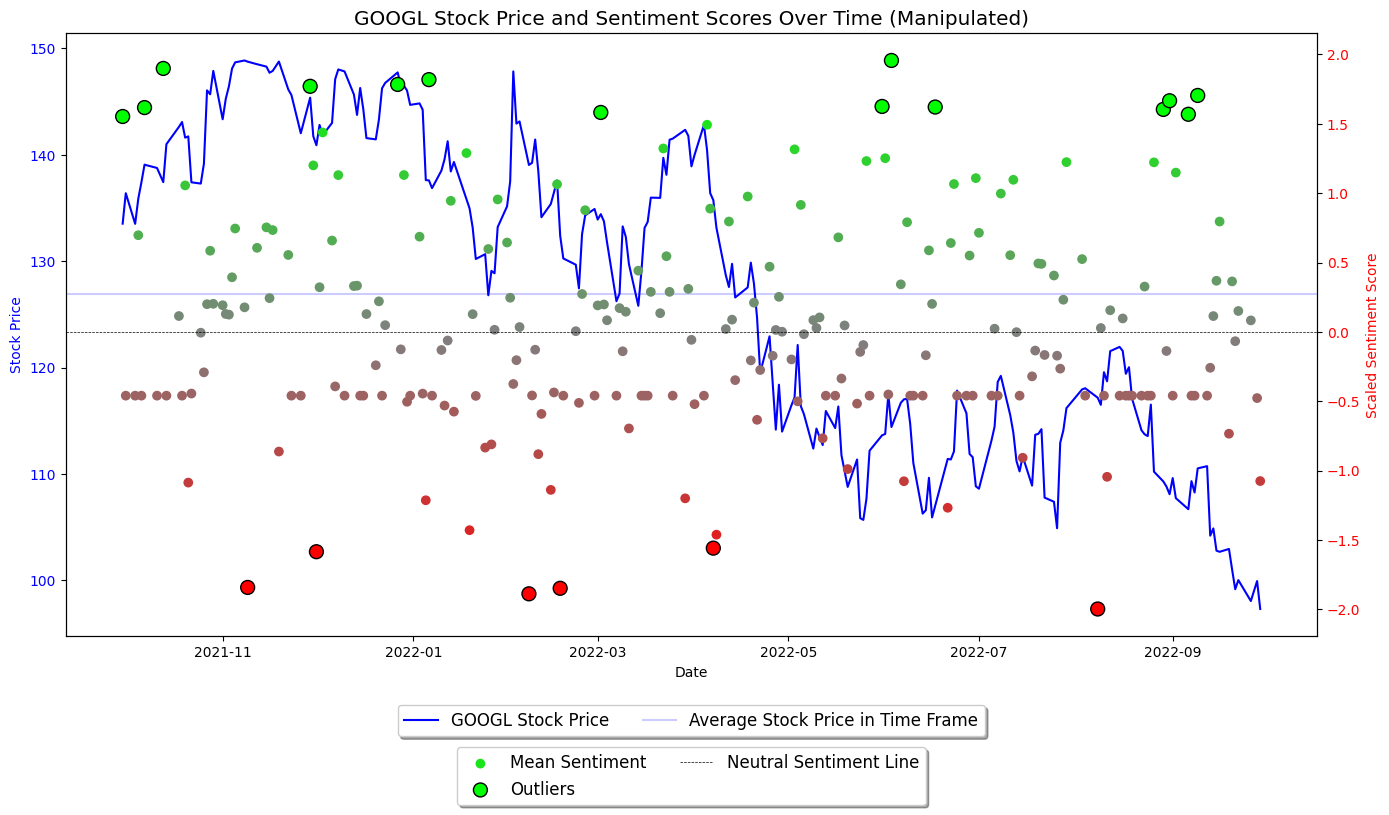

Manipulation Percentage B: 18.75%
Total Manipulation Percentage of Tweets: 34.375%


C:\Users\kians\AppData\Local\Temp\ipykernel_78304\3538020118.py:114: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_extreme_scores = df_google_filtered.groupby('Date').apply(


In [11]:
googl_stock = get(["GOOGL"], datetime.datetime(2018, 10, 1), datetime.datetime(2024, 1, 1))
googl_stock = googl_stock.reset_index(level='Ticker', drop=True).reset_index()

final_scores = []
for result in results_google:
    sentiment = result[1][0]
    label = sentiment["label"]
    score = sentiment["score"]

    # LABEL_0: Negative
    # LABEL_1: Neutral
    # LABEL_2: Positive
    if label == "positive":
        final_scores.append(score)
    elif label == "negative":
        final_scores.append(-1*score)
    else:
        final_scores.append(0)
df_google.loc[:,"score"] = final_scores
# Now the data and scores are merged

df_google['Date'] = pd.to_datetime(df_google['Date']).dt.normalize()
df_google['Date'] = pd.to_datetime(df_google['Date']).dt.tz_localize(None)
googl_stock['Date'] = pd.to_datetime(googl_stock['Date']).dt.normalize()

df_google_filtered = df_google[(df_google['Date'] >= googl_stock['Date'].min()) & (df_google['Date'] <= googl_stock['Date'].max())]

# Aggregate sentiment scores by taking mean for each date:
df_google_agg = df_google_filtered.groupby('Date').agg({'score': 'mean'}).reset_index()

# Merge it with stock dataframe:
df_merged_google = pd.merge(googl_stock, df_google_agg, on='Date', how='inner')
print("Number of rows in df_merged_google:", len(df_merged_google))

# Short- and Long-term moving averages:
short_window = 20
long_window = 50
df_merged_google['SMA'] = df_merged_google['Adj Close'].rolling(window=short_window).mean()
df_merged_google['LMA'] = df_merged_google['Adj Close'].rolling(window=long_window).mean()

# Scaler for our practicality of detecting outliers:
scaler = RobustScaler()
df_merged_google['scaled_score'] = scaler.fit_transform(df_merged_google[['score']])

# custom threshold of outliers
threshold = 1.5
outliers = df_merged_google[(df_merged_google['scaled_score'] > threshold) | (df_merged_google['scaled_score'] < -threshold)]

# Dataframe of only outliers:
outliers_df = df_merged_google.loc[outliers.index]

below_lma = df_merged_google['SMA'] < df_merged_google['LMA']
above_lma = df_merged_google['SMA'] > df_merged_google['LMA']

# Custom-made system to determine a manipulation index,
# giving outliers 1, 2 or 8 points based on relativity to stock price condition:
def manipulation_score(row):
    if (row['scaled_score'] > 0 and below_lma.loc[row.name]) or (row['scaled_score'] < 0 and above_lma.loc[row.name]):
        return 8
    elif (row['scaled_score'] > 0 and df_merged_google['Adj Close'].loc[row.name] < df_merged_google['Adj Close'].shift(1).loc[row.name]) or (row['scaled_score'] < 0 and df_merged_google['Adj Close'].loc[row.name] > df_merged_google['Adj Close'].shift(1).loc[row.name]):
        return 2
    else:
        return 1
    
outliers_df['Manipulation Score'] = outliers_df.apply(manipulation_score, axis=1)

manipulation_ratio_1 = outliers_df['Manipulation Score'].sum() / (len(outliers_df) * 8)
manipulation_percentage_1 = f"{100*manipulation_ratio_1}%"
print("Manipulation Percentage A:", manipulation_percentage_1)

# Custom color map for sentiment plots
colors = [(1, 0, 0), (0.5, 0.5, 0.5), (0, 1, 0)]  # R -> Gray -> G
n_bins = 100  # Discretize the color map into 100 bins
cmap_name = 'sentiment_cmap'
sentiment_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Normalizing the sentiment scores to [0, 1] for color mapping
norm = plt.Normalize(df_merged_google['scaled_score'].min(), df_merged_google['scaled_score'].max())
sm = plt.cm.ScalarMappable(cmap=sentiment_cmap, norm=norm)
df_merged_google['color'] = df_merged_google['scaled_score'].apply(lambda x: sm.to_rgba(x))

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting Adj. Close prices
sns.lineplot(x='Date', y='Adj Close', data=df_merged_google, ax=ax1, color='blue', label='GOOGL Stock Price')
ax1.set_ylabel('Stock Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
avg_stock_price = df_merged_google['Adj Close'].mean()
ax1.axhline(y=avg_stock_price, color='blue', linestyle='-', label=f'Average Stock Price in Time Frame', alpha=0.2)

# Plotting the combined mean of sentiment scores
ax2 = ax1.twinx()
ax2.scatter(df_merged_google['Date'], df_merged_google['scaled_score'], color=df_merged_google['color'], label='Mean Sentiment')
ax2.scatter(outliers_df['Date'], outliers_df['scaled_score'], 
            c=outliers_df['scaled_score'].apply(lambda x: 'lime' if x >= 0 else 'red'), 
            marker='o', edgecolors='black', label='Outliers', s=100)  # Adjust size of outliers
ax2.axhline(y=0.0, color='black', linestyle='--', linewidth=0.5, label='Neutral Sentiment Line')  # Add horizontal line at sentiment score 0.0
ax2.set_ylabel('Scaled Sentiment Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
plt.title('GOOGL Stock Price and Sentiment Scores Over Time (Manipulated)', fontsize='x-large')
fig.tight_layout()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2, fontsize='large')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17), shadow=True, ncol=2, fontsize='large')

plt.show()

# New way of determining sentiment plots per date: 
# Instead of taking the full mean, we are taking the mean of the 5 largest and 5 lowest sentiment scores combined.
# This identifies different outlier points than before where we take the enitre mean, because we ONLY value the extreme sentiment scores here.
av_count = 5
df_extreme_scores = df_google_filtered.groupby('Date').apply(
    lambda x: pd.concat([x.nlargest(av_count, 'score'), x.nsmallest(av_count, 'score')])
).reset_index(drop=True)

# Calculation of combined mean of the 5 highest and 5 lowest sentiment scores for each date:
df_combined_mean = df_extreme_scores.groupby('Date')['score'].mean().reset_index()

# Apply RobustScaler again:
scaler = RobustScaler()
df_combined_mean['scaled_score'] = scaler.fit_transform(df_combined_mean[['score']])

# Detect outliers based on the same custom threshold:
threshold = 1.5
outliers2 = df_combined_mean[(df_combined_mean['scaled_score'] > threshold) | (df_combined_mean['scaled_score'] < -threshold)]

# New dataframe of outliers:
outliers2_df = pd.merge(outliers2, googl_stock, on='Date', how='inner')

df_merged_google = pd.merge(googl_stock, df_combined_mean, on='Date', how='inner')

# Calculate short-term and long-term moving averages
short_window = 20
long_window = 50

df_merged_google['SMA'] = df_merged_google['Adj Close'].rolling(window=short_window).mean()
df_merged_google['LMA'] = df_merged_google['Adj Close'].rolling(window=long_window).mean()

outliers2_df['Manipulation Score'] = outliers2_df.apply(manipulation_score, axis=1)

# Print the desired ratio
manipulation_ratio_2 = outliers2_df['Manipulation Score'].sum() / (len(outliers2_df) * 8)
manipulation_percentage_2 = f"{100*manipulation_ratio_2}%"
print("Manipulation Percentage B:", manipulation_percentage_2)

manipulation_ratio_combined = (manipulation_ratio_1 + manipulation_ratio_2)/2
google_manipulation_percentage_combined = f"{100*manipulation_ratio_combined}%"
print("Total Manipulation Percentage of Tweets:", google_manipulation_percentage_combined)


## MICROSOFT:

[*********************100%%**********************]  1 of 1 completed


Number of rows in df_merged_microsoft: 252
Manipulation Percentage A: 48.89705882352941%


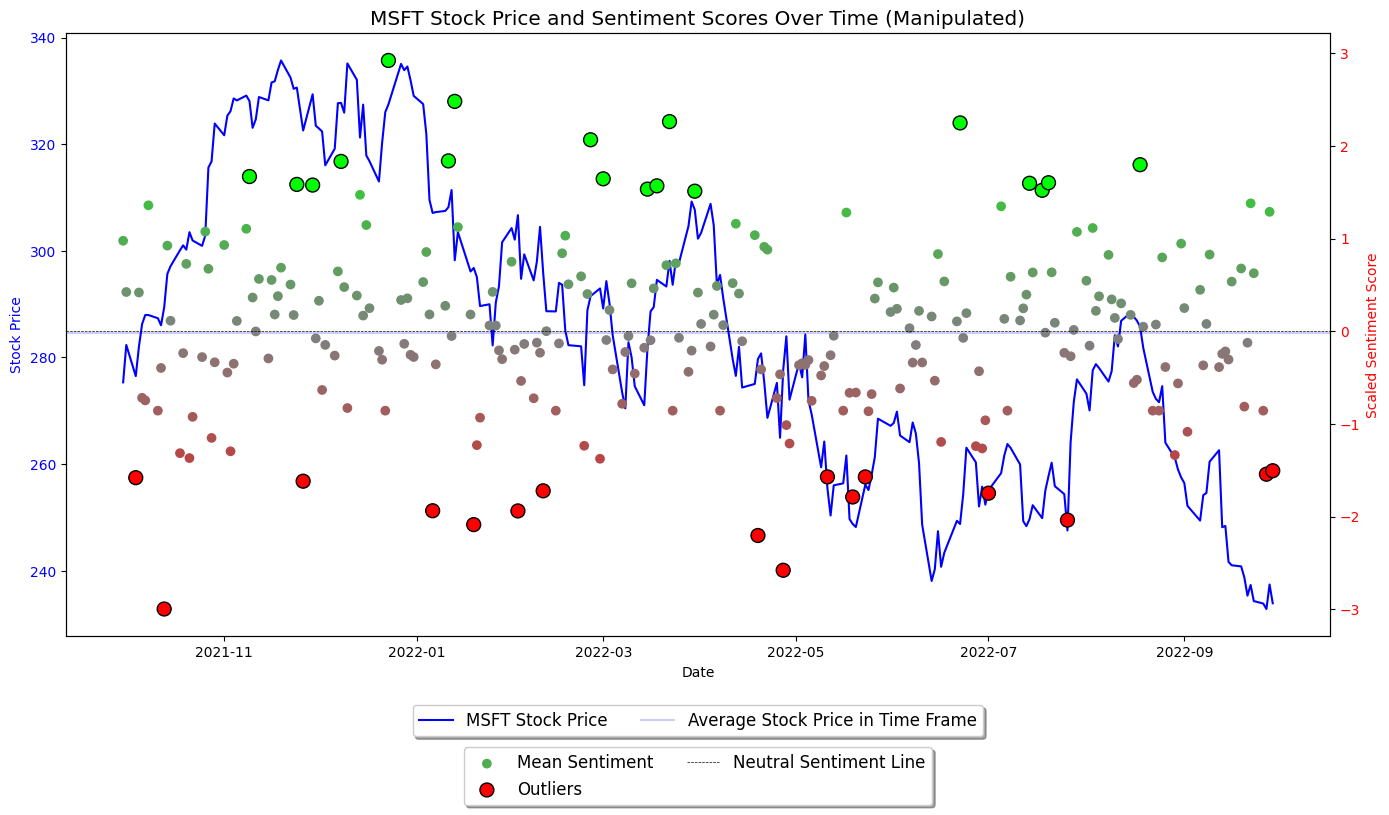

Manipulation Percentage B: 15.0%
Total Manipulation Percentage of Tweets: 31.948529411764703%


C:\Users\kians\AppData\Local\Temp\ipykernel_78304\1581004309.py:114: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_extreme_scores = df_microsoft_filtered.groupby('Date').apply(


In [12]:
msft_stock = get(["MSFT"], datetime.datetime(2018, 10, 1), datetime.datetime(2024, 1, 1))
msft_stock = msft_stock.reset_index(level='Ticker', drop=True).reset_index()

final_scores = []
for result in results_microsoft:
    sentiment = result[1][0]
    label = sentiment["label"]
    score = sentiment["score"]

    # LABEL_0: Negative
    # LABEL_1: Neutral
    # LABEL_2: Positive
    if label == "positive":
        final_scores.append(score)
    elif label == "negative":
        final_scores.append(-1*score)
    else:
        final_scores.append(0)
df_microsoft.loc[:,"score"] = final_scores
# Now the data and scores are merged

df_microsoft['Date'] = pd.to_datetime(df_microsoft['Date']).dt.normalize()
df_microsoft['Date'] = pd.to_datetime(df_microsoft['Date']).dt.tz_localize(None)
msft_stock['Date'] = pd.to_datetime(msft_stock['Date']).dt.normalize()

df_microsoft_filtered = df_microsoft[(df_microsoft['Date'] >= msft_stock['Date'].min()) & (df_microsoft['Date'] <= msft_stock['Date'].max())]

# Aggregate sentiment scores by taking mean for each date:
df_microsoft_agg = df_microsoft_filtered.groupby('Date').agg({'score': 'mean'}).reset_index()

# Merge it with stock dataframe:
df_merged_microsoft = pd.merge(msft_stock, df_microsoft_agg, on='Date', how='inner')
print("Number of rows in df_merged_microsoft:", len(df_merged_microsoft))

# Short- and Long-term moving averages:
short_window = 20
long_window = 50
df_merged_microsoft['SMA'] = df_merged_microsoft['Adj Close'].rolling(window=short_window).mean()
df_merged_microsoft['LMA'] = df_merged_microsoft['Adj Close'].rolling(window=long_window).mean()

# Scaler for our practicality of detecting outliers:
scaler = RobustScaler()
df_merged_microsoft['scaled_score'] = scaler.fit_transform(df_merged_microsoft[['score']])

# custom threshold of outliers
threshold = 1.5
outliers = df_merged_microsoft[(df_merged_microsoft['scaled_score'] > threshold) | (df_merged_microsoft['scaled_score'] < -threshold)]

# Dataframe of only outliers:
outliers_df = df_merged_microsoft.loc[outliers.index]

below_lma = df_merged_microsoft['SMA'] < df_merged_microsoft['LMA']
above_lma = df_merged_microsoft['SMA'] > df_merged_microsoft['LMA']

# Custom-made system to determine a manipulation index,
# giving outliers 1, 2 or 8 points based on relativity to stock price condition:
def manipulation_score(row):
    if (row['scaled_score'] > 0 and below_lma.loc[row.name]) or (row['scaled_score'] < 0 and above_lma.loc[row.name]):
        return 8
    elif (row['scaled_score'] > 0 and df_merged_microsoft['Adj Close'].loc[row.name] < df_merged_microsoft['Adj Close'].shift(1).loc[row.name]) or (row['scaled_score'] < 0 and df_merged_microsoft['Adj Close'].loc[row.name] > df_merged_microsoft['Adj Close'].shift(1).loc[row.name]):
        return 2
    else:
        return 1
    
outliers_df['Manipulation Score'] = outliers_df.apply(manipulation_score, axis=1)

manipulation_ratio_1 = outliers_df['Manipulation Score'].sum() / (len(outliers_df) * 8)
manipulation_percentage_1 = f"{100*manipulation_ratio_1}%"
print("Manipulation Percentage A:", manipulation_percentage_1)

# Custom color map for sentiment plots
colors = [(1, 0, 0), (0.5, 0.5, 0.5), (0, 1, 0)]  # R -> Gray -> G
n_bins = 100  # Discretize the color map into 100 bins
cmap_name = 'sentiment_cmap'
sentiment_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Normalizing the sentiment scores to [0, 1] for color mapping
norm = plt.Normalize(df_merged_microsoft['scaled_score'].min(), df_merged_microsoft['scaled_score'].max())
sm = plt.cm.ScalarMappable(cmap=sentiment_cmap, norm=norm)
df_merged_microsoft['color'] = df_merged_microsoft['scaled_score'].apply(lambda x: sm.to_rgba(x))

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting Adj. Close prices
sns.lineplot(x='Date', y='Adj Close', data=df_merged_microsoft, ax=ax1, color='blue', label='MSFT Stock Price')
ax1.set_ylabel('Stock Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
avg_stock_price = df_merged_microsoft['Adj Close'].mean()
ax1.axhline(y=avg_stock_price, color='blue', linestyle='-', label=f'Average Stock Price in Time Frame', alpha=0.2)

# Plotting the combined mean of sentiment scores
ax2 = ax1.twinx()
ax2.scatter(df_merged_microsoft['Date'], df_merged_microsoft['scaled_score'], color=df_merged_microsoft['color'], label='Mean Sentiment')
ax2.scatter(outliers_df['Date'], outliers_df['scaled_score'], 
            c=outliers_df['scaled_score'].apply(lambda x: 'lime' if x >= 0 else 'red'), 
            marker='o', edgecolors='black', label='Outliers', s=100)  # Adjust size of outliers
ax2.axhline(y=0.0, color='black', linestyle='--', linewidth=0.5, label='Neutral Sentiment Line')  # Add horizontal line at sentiment score 0.0
ax2.set_ylabel('Scaled Sentiment Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
plt.title('MSFT Stock Price and Sentiment Scores Over Time (Manipulated)', fontsize='x-large')
fig.tight_layout()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2, fontsize='large')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17), shadow=True, ncol=2, fontsize='large')

plt.show()

# New way of determining sentiment plots per date: 
# Instead of taking the full mean, we are taking the mean of the 5 largest and 5 lowest sentiment scores combined.
# This identifies different outlier points than before where we take the enitre mean, because we ONLY value the extreme sentiment scores here.
av_count = 5
df_extreme_scores = df_microsoft_filtered.groupby('Date').apply(
    lambda x: pd.concat([x.nlargest(av_count, 'score'), x.nsmallest(av_count, 'score')])
).reset_index(drop=True)

# Calculation of combined mean of the 5 highest and 5 lowest sentiment scores for each date:
df_combined_mean = df_extreme_scores.groupby('Date')['score'].mean().reset_index()

# Apply RobustScaler again:
scaler = RobustScaler()
df_combined_mean['scaled_score'] = scaler.fit_transform(df_combined_mean[['score']])

# Detect outliers based on the same custom threshold:
threshold = 1.5
outliers2 = df_combined_mean[(df_combined_mean['scaled_score'] > threshold) | (df_combined_mean['scaled_score'] < -threshold)]

# New dataframe of outliers:
outliers2_df = pd.merge(outliers2, msft_stock, on='Date', how='inner')

df_merged_microsoft = pd.merge(msft_stock, df_combined_mean, on='Date', how='inner')

# Calculate short-term and long-term moving averages
short_window = 20
long_window = 50

df_merged_microsoft['SMA'] = df_merged_microsoft['Adj Close'].rolling(window=short_window).mean()
df_merged_microsoft['LMA'] = df_merged_microsoft['Adj Close'].rolling(window=long_window).mean()

outliers2_df['Manipulation Score'] = outliers2_df.apply(manipulation_score, axis=1)

# Print the desired ratio
manipulation_ratio_2 = outliers2_df['Manipulation Score'].sum() / (len(outliers2_df) * 8)
manipulation_percentage_2 = f"{100*manipulation_ratio_2}%"
print("Manipulation Percentage B:", manipulation_percentage_2)

manipulation_ratio_combined = (manipulation_ratio_1 + manipulation_ratio_2)/2
microsoft_manipulation_percentage_combined = f"{100*manipulation_ratio_combined}%"
print("Total Manipulation Percentage of Tweets:", microsoft_manipulation_percentage_combined)


Notes to myself:
Use RobustScaler to highlight outliers

Outlier: +1 score

Postitive outlier in downwards trend: +2 score
Negative outlier in upwards trend: +2 score

Positive outlier while SMA lies below LMA: +8 score
Negative outlier while SMA lies above LMA: +8 score

Final grade = Total score / (Total number of outliers * 8)

appl
tesla
microsoft
google

# NEWS ANALYSIS

In [ ]:
#%pip install yahoo_fin
#%pip install python-dateutil

In [56]:
import numpy as np
import pandas as pd
from yahoo_fin import news
from dateutil import parser
import datetime
import pytz

# Define the ticker symbol for the stock of interest
ticker = "PHG"  # Apple Inc.

# Fetch news articles related to the specified stock
news_articles = news.get_yf_rss(ticker)

# Define the date range and make them timezone-aware (UTC)
start_date = datetime.datetime(2024, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2024, 12, 31, tzinfo=pytz.UTC)

# Filter articles by date
filtered_articles = []
for article in news_articles:
    pub_date_str = article.get('published', article.get('pubDate', 'N/A'))
    print("Raw publication date string:", pub_date_str)
    
    try:
        pub_date = parser.parse(pub_date_str)
        print("Parsed publication date:", pub_date)
        
        if start_date <= pub_date <= end_date:
            filtered_articles.append(article)
            print("Article within date range:", article['title'])
        else:
            print("Article outside date range")
    except (ValueError, TypeError) as e:
        # Handle parsing errors or missing dates
        print("Error parsing date:", e)
        pass

# Display the filtered news articles
for article in filtered_articles:
    print("Title:", article.get('title', 'N/A'))
    print("Link:", article.get('link', 'N/A'))
    print("Date:", article.get('published', article.get('pubDate', 'N/A')))
    print("Description:", article.get('summary', article.get('description', 'N/A')))
    print("\n")

print(f"Total articles between {start_date.date()} and {end_date.date()}: {len(filtered_articles)}")


Raw publication date string: Fri, 12 Jul 2024 18:55:21 +0000
Parsed publication date: 2024-07-12 18:55:21+00:00
Article within date range: China’s Transsion sued by Qualcomm and Philips as IP woes mount
Raw publication date string: Fri, 12 Jul 2024 14:46:00 +0000
Parsed publication date: 2024-07-12 14:46:00+00:00
Article within date range: Philips (PHG) Gains Despite Recall of SENSE XL Torso Coils
Raw publication date string: Tue, 09 Jul 2024 10:57:50 +0000
Parsed publication date: 2024-07-09 10:57:50+00:00
Article within date range: Philips recall of imaging coils tied to 12 injuries
Raw publication date string: Wed, 03 Jul 2024 10:59:15 +0000
Parsed publication date: 2024-07-03 10:59:15+00:00
Article within date range: Artisan Investments raises stake in Philips to 10%, regulatory filing shows
Raw publication date string: Wed, 03 Jul 2024 06:00:00 +0000
Parsed publication date: 2024-07-03 06:00:00+00:00
Article within date range: Philips appoints Ling Liu as Chief Region Leader of Ph

## MODEL 1: Roberta

In [57]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from yahoo_fin import news
from dateutil import parser

# Function to perform sentiment analysis on news articles for a given ticker
def analyze_sentiment_for_ticker(ticker):
    # Fetch news articles related to the specified stock
    # Fetch news articles related to the specified stock
    news_articles = news.get_yf_rss(ticker)

    # Filter articles to ensure the title contains the stock ticker name or company name
    filtered_articles = [
        article for article in news_articles
        if ticker in article.get('title', '')
    ]

    # Ensure articles are sorted by publication date and get the latest 4 articles
    sorted_articles = sorted(filtered_articles, key=lambda x: parser.parse(x.get('published', x.get('pubDate', ''))), reverse=True)
    latest_articles = sorted_articles[:4]
    longer_latest_articles = sorted_articles[:20]
    print(f"recent articles available: {len(longer_latest_articles)}")

    
    # Load the sentiment analysis model and tokenizer
    model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    
    # Create a sentiment analysis pipeline using the loaded model and tokenizer
    sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
    
    # Perform sentiment analysis on the latest 4 articles
    for article in latest_articles:
        title = article.get('title', 'N/A')
        description = article.get('summary', article.get('description', 'N/A'))
        pub_date = article.get('published', article.get('pubDate', 'N/A'))
        
        # Combine title and description for sentiment analysis
        text = f"{title}. {description}"
        
        
        
        # Get sentiment
        sentiment = sentiment_analysis(text[:512])[0]  # limit to 512 tokens for the model
        
        # Display the article information and sentiment
        print(f"Ticker: {ticker}")
        print(f"Title: {title}")
        print(f"Link: {article.get('link', 'N/A')}")
        print(f"Date: {pub_date}")
        print(f"Description: {description}")
        print(f"Sentiment: {sentiment['label']} with score {sentiment['score']:.2f}")
        
        # Determine sentiment intensity
        if sentiment['score'] > 0.15:
            if sentiment['score'] > 0.5:
                if sentiment['score'] > 0.75:
                    print("+++")
                else:
                    print("++")
            else:
                print("+")
        elif sentiment['score'] < -0.15:
            if sentiment['score'] < -0.5:
                if sentiment['score'] < -0.75:
                    print("---")
                else:
                    print("--")
            else:
                print("-")
        else:
            print("~")
        
        print("\n")

# List of tickers to analyze
tickers = ["AAPL", "TSLA"]

# Analyze sentiment for each ticker in the list
for ticker in tickers:
    print(f"Analyzing sentiment for {ticker}...\n")
    analyze_sentiment_for_ticker(ticker)
    
# +++: Very positive, ++: Positive, +: Merely positive, ~: Neutral, -: Merely negative, --: Negative, ---: Very negative

Analyzing sentiment for AAPL...

recent articles available: 1


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Ticker: AAPL
Title: Apple (AAPL) Beats Stock Market Upswing: What Investors Need to Know
Link: https://finance.yahoo.com/news/apple-aapl-beats-stock-market-214517805.html?.tsrc=rss
Date: Mon, 15 Jul 2024 21:45:17 +0000
Description: Apple (AAPL) reachead $234.41 at the closing of the latest trading day, reflecting a +1.68% change compared to its last close.
Sentiment: positive with score 0.87
+++


Analyzing sentiment for TSLA...

recent articles available: 1


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Ticker: TSLA
Title: Tesla (TSLA) Surpasses Market Returns: Some Facts Worth Knowing
Link: https://finance.yahoo.com/news/tesla-tsla-surpasses-market-returns-214521107.html?.tsrc=rss
Date: Mon, 15 Jul 2024 21:45:21 +0000
Description: Tesla (TSLA) concluded the recent trading session at $252.64, signifying a +1.78% move from its prior day's close.
Sentiment: positive with score 0.89
+++




## MODEL 2: VADER

In [ ]:
#%pip install vaderSentiment

In [58]:
from yahoo_fin import news
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from dateutil import parser

# Define a list of stocks with their ticker symbols and company names
stocks = [
    {"ticker": "AAPL", "company_name": "Apple", "industry": "Tech"},
    {"ticker": "TSLA", "company_name": "Tesla", "industry": "Tech"},
    {"ticker": "PHG", "company_name": "Philips", "industry": "Tech"},
]

# VADER
analyzer = SentimentIntensityAnalyzer()

# Function to analyze news articles for a given stock
def analyze_stock_news(ticker, company_name, industry):
    news_articles = news.get_yf_rss(ticker)

    filtered_articles = [
        article for article in news_articles
        if ticker in article.get('title', '') or company_name in article.get('title', '') or industry in article.get('title', '')
    ]

    sorted_articles = sorted(filtered_articles, key=lambda x: parser.parse(x.get('published', x.get('pubDate', ''))), reverse=True)
    latest_articles = sorted_articles[:4]

    for article in latest_articles:
        title = article.get('title', 'N/A')
        description = article.get('summary', article.get('description', 'N/A'))
        pub_date = article.get('published', article.get('pubDate', 'N/A'))
        
        text = f"{title}. {description}"
        
        sentiment_scores = analyzer.polarity_scores(text)
        compound_score = sentiment_scores['compound']
        
        if compound_score >= 0.05:
            sentiment_label = 'Positive'
        elif compound_score <= -0.05:
            sentiment_label = 'Negative'
        else:
            sentiment_label = 'Neutral'
        
        print(f"Ticker: {ticker}")
        print(f"Article header: {title}")
        print(f"Link: {article.get('link', 'N/A')}")
        print(f"Date: {pub_date}")
        print(f"Description: {description}")
        print(f"Sentiment: {sentiment_label} with compound score {compound_score}")
        
        if compound_score > 0.15:
            if compound_score > 0.5:
                if compound_score > 0.75:
                    print("+++")
                else:
                    print("++")
            else:
                print("+")
        elif compound_score < -0.15:
            if compound_score < -0.5:
                if compound_score < -0.75:
                    print("---")
                else:
                    print("--")
            else:
                print("-")
        else:
            print("~")
        
        print("\n")

# Analyze news for each stock in the list
for stock in stocks:
    analyze_stock_news(stock["ticker"], stock["company_name"], stock["industry"])


Ticker: AAPL
Article header: Where Will Apple Stock Be in 5 Years?
Link: https://www.fool.com/investing/2024/07/16/where-will-apple-stock-be-in-5-years/?source=eptyholnk0000202&utm_source=yahoo-host-full&utm_medium=feed&utm_campaign=article&referring_guid=f0c9368d-eacd-4890-ae2d-6c2ccacf45c8&.tsrc=rss
Date: Tue, 16 Jul 2024 09:02:00 +0000
Description: Shareholders hope the good times can continue, but that might not be the case.
Sentiment: Positive with compound score 0.4404
+


Ticker: AAPL
Article header: Trending tickers: Apple, Ocado, Richemont and Rio Tinto
Link: https://uk.finance.yahoo.com/news/apple-ocado-richemont-rio-tinto-trending-tickers-083119609.html?.tsrc=rss
Date: Tue, 16 Jul 2024 08:31:19 +0000
Description: The latest investor updates on stocks that are trending on Tuesday.
Sentiment: Neutral with compound score 0.0
~


Ticker: AAPL
Article header: At last, Apple's Messages app will support RCS and scheduling texts
Link: https://techcrunch.com/2024/07/15/at-last-apples

## MODEL 3: Distilbert

In [ ]:
#%pip install tf-keras

In [59]:
from transformers import pipeline
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from yahoo_fin import news
from dateutil import parser

stocks = [
    {"ticker": "AAPL", "company_name": "Apple", "industry": "Tech"},
    {"ticker": "TSLA", "company_name": "Tesla", "industry": "Tech"},
    {"ticker": "PHG", "company_name": "Philips", "industry": "Tech"}
]

# Load sentiment analysis model & tokenizer
model_name = "bhadresh-savani/distilbert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Pipeline:
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

# Function to fetch and analyze news articles for a given stock
def analyze_stock_news(ticker, company_name, industry):
    news_articles = news.get_yf_rss(ticker)

    filtered_articles = [
        article for article in news_articles
        if ticker in article.get('title', '') or company_name in article.get('title', '') or industry in article.get('title', '')
    ]

    sorted_articles = sorted(filtered_articles, key=lambda x: parser.parse(x['published'] if 'published' in x else x['pubDate']), reverse=True)
    latest_articles = sorted_articles[:4]

    for article in latest_articles:
        title = article.get('title', 'N/A')
        description = article.get('summary', article.get('description', 'N/A'))
        pub_date = article.get('published', article.get('pubDate', 'N/A'))

        text = f"{title}. {description}"

        prediction = classifier(text[:512])[0]  # limit to 512 tokens for the model

        print(f"Ticker: {ticker}")
        print(f"Article header: {title}")
        print(f"Link: {article.get('link', 'N/A')}")
        print(f"Date: {pub_date}")
        print(f"Description: {description}")
        for entry in prediction:
            label = entry['label']
            score = entry['score']

            if label in ['joy', 'anger', 'fear', 'surprise']:
                print(f"{label}: {score}")
        print("\n")

# Analyze news for each stock in the list
for stock in stocks:
    analyze_stock_news(stock["ticker"], stock["company_name"], stock["industry"])


C:\Users\kians\OneDrive\Documenten\AIMLFSFolder\myenv\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Ticker: AAPL
Article header: Where Will Apple Stock Be in 5 Years?
Link: https://www.fool.com/investing/2024/07/16/where-will-apple-stock-be-in-5-years/?source=eptyholnk0000202&utm_source=yahoo-host-full&utm_medium=feed&utm_campaign=article&referring_guid=f0c9368d-eacd-4890-ae2d-6c2ccacf45c8&.tsrc=rss
Date: Tue, 16 Jul 2024 09:02:00 +0000
Description: Shareholders hope the good times can continue, but that might not be the case.
joy: 0.9974144697189331
anger: 0.0005177491693757474
fear: 0.0002505128213670105
surprise: 0.00016005490033421665


Ticker: AAPL
Article header: Trending tickers: Apple, Ocado, Richemont and Rio Tinto
Link: https://uk.finance.yahoo.com/news/apple-ocado-richemont-rio-tinto-trending-tickers-083119609.html?.tsrc=rss
Date: Tue, 16 Jul 2024 08:31:19 +0000
Description: The latest investor updates on stocks that are trending on Tuesday.
joy: 0.9196919798851013
anger: 0.022397352382540703
fear: 0.04728744924068451
surprise: 0.0023314652498811483


Ticker: AAPL
Article 

Note to self: 

In [ ]:
# IDEA TO SELF: Do the text sentiment analysis for Tweets like before, but use this model too and incorporate the scores:
#  - joy
#  - anger
#  - fear
#  - surprise
# These are strong, expressive emotions that may create urgency to encourage buying a stock, for example, an exaggerated
# article which stirs up surprise and fear about a stock, will drive a sense of rapidly panick-buying or panick-selling the 
# stock.

#joy:      20%  # if > 0.95, give extra weight for manipulation
#anger:    20%  # if > 0.5, give extra weight for manipulation
#fear:     20%  # if > 0.5, give extra weight for manipulation
#surprise: 40%  # if > 0.007, give HIGHER extra weight for manipulation

Manipulation score calculation:

We have available:
- Tweets sentiment graph
- News sentiment 1
- News sentiment 2
- News sentiment (emotions based)

Determine manipulation score by:
- Tweets sentiment graph: Outliers
- News sentiment 1: Extreme scores
- News sentiment 2: Extreme scores
- News sentiment (emotions based): Surprise scores over 0.007

# STOCK VOLUME VS. POPULARITY MEASUREMENT

In [25]:
# Saving/loading method:

from joblib import dump
dump(results_apple, 'results_apple.joblib')
from joblib import load
loaded_model = load('results_apple.joblib')
print(loaded_model[:5])

[*********************100%%**********************]  1 of 1 completed


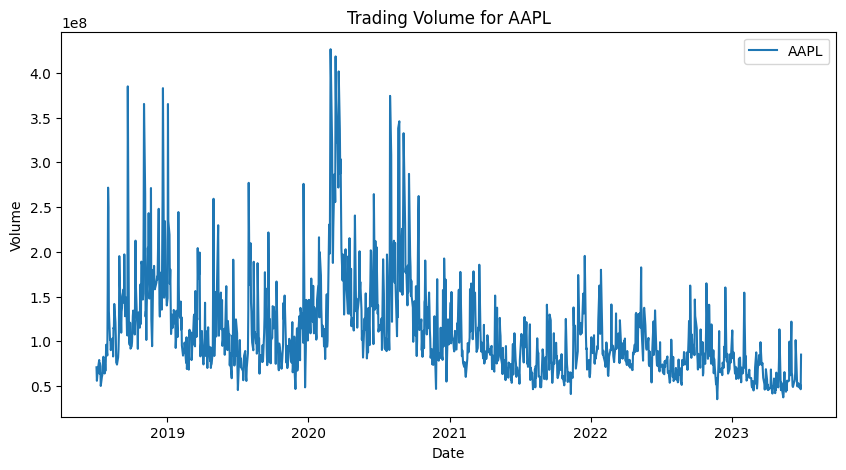

[*********************100%%**********************]  1 of 1 completed


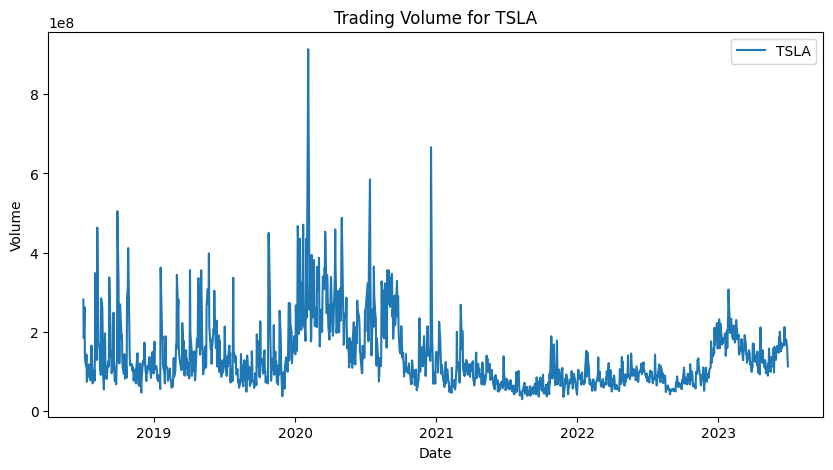

[*********************100%%**********************]  1 of 1 completed


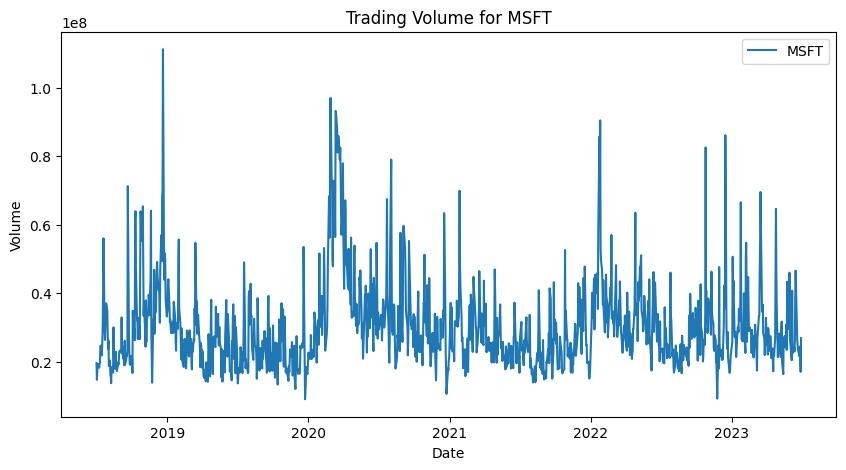

[*********************100%%**********************]  1 of 1 completed


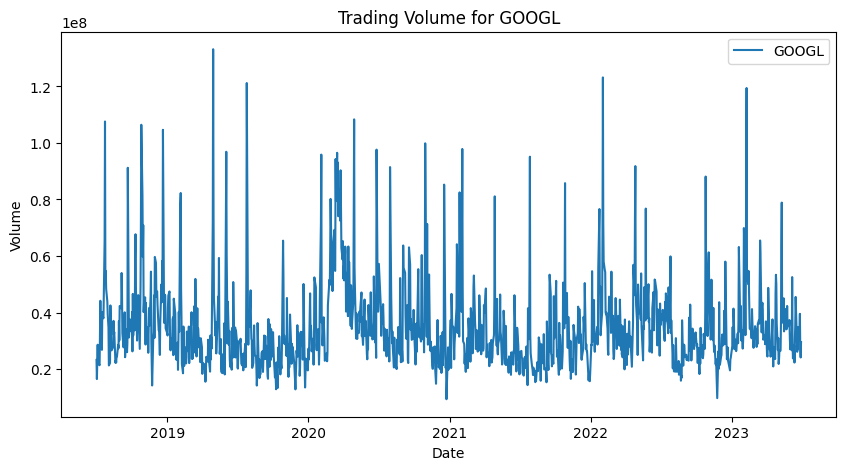

In [60]:
import yfinance as yf
import matplotlib.pyplot as plt

tickers = ["AAPL", "TSLA", "MSFT", "GOOGL"]

start_date = "2018-07-01"
end_date = "2023-07-01"

for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    # Ploting trading volume
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data['Volume'], label=ticker)
    plt.title(f'Trading Volume for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

In [ ]:
#%pip install pytrends